In [2]:
# 연평균 성장률(CAGR) : ((last value/first value)^(1/year)-1)
def getCAGR(first, last, years):
    return (last/first)**(1/years) - 1

# 삼성전자 1988.4.27 ~ 2018.4.27 20년간
cagr = getCAGR(65300, 2669000,20)
cagr

0.2038483161140714

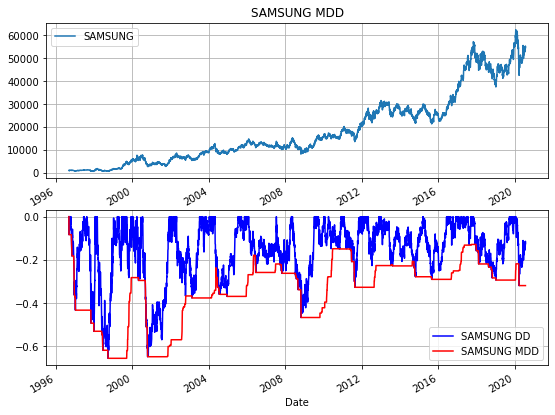

In [3]:
# 최대 손실 낙폭 MDD (maximum drawdown) : ((종가-최고점)/최고점 의 최소값) : 고점 대비 하락폭이 특정 기간동안 제일 큰 값
import FinanceDataReader as fdr 
import matplotlib.pyplot as plt

# 삼성전자 가격데이터
samsung = fdr.DataReader('005930', '1900-01-01')
window = 252

peak = samsung['Close'].rolling(window, min_periods=1).max()
# print(peak)
drawdown = samsung['Close']/peak - 1
mdd = drawdown.rolling(window, min_periods=1).min()

plt.figure(figsize=(9, 7))
plt.subplot(211)
samsung['Close'].plot(label='SAMSUNG', title='SAMSUNG MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='SAMSUNG DD', grid=True, legend=True)
mdd.plot(c='red', label='SAMSUNG MDD', grid=True, legend=True)
plt.show()

In [4]:
mdd.min()

-0.6555075593952484

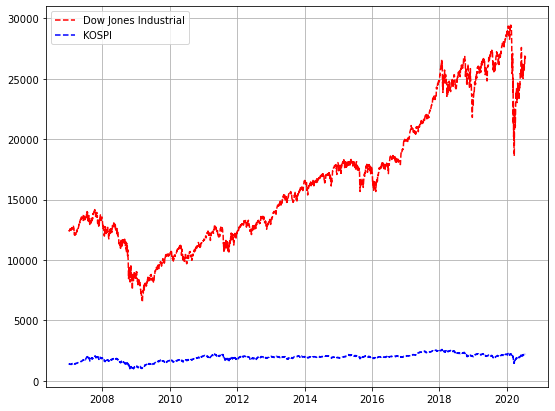

In [5]:
# kospi와 dow jones 지수 종가 단순 비교

kospi = fdr.DataReader('KS11', '2007-01-01')
dow = fdr.DataReader('DJI', '2007-01-01')

plt.figure(figsize=(9, 7))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b--', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

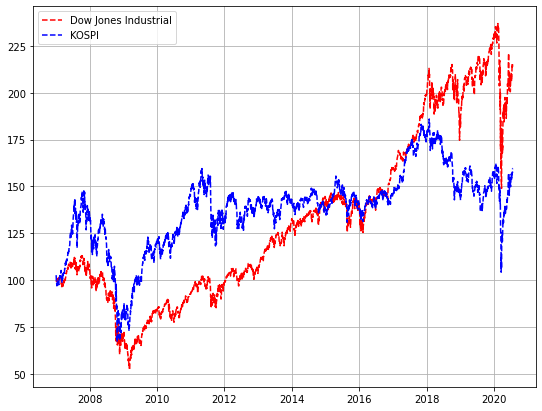

In [6]:
# kospi와 dow jones 지수 지수화 비교

d=(dow.Close / dow.Close.loc['2007-01-04'])*100
k=(kospi.Close / kospi.Close.loc['2007-01-04'])*100

plt.figure(figsize=(9, 7))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial')
plt.plot(k.index, k, 'b--', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

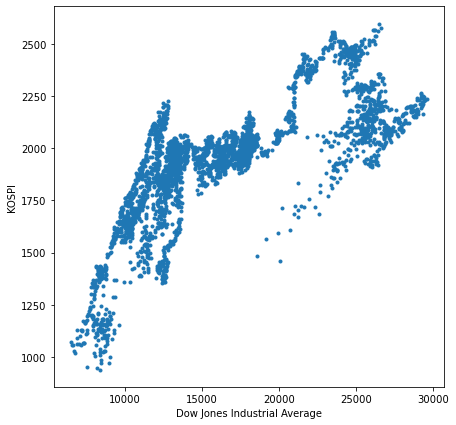

In [7]:
# kospi와 dow jones 지수 산점도 분석
# 데이터 갯수가 다르면 산점도가 안그려지므로 일단 데이터 프레임 형태로 만듬
import pandas as pd
df = pd.DataFrame({'DOW':dow['Close'], 'KOSPI':kospi['Close']})
df = df.fillna(method='bfill') # 뒷값으로 채움
df = df.fillna(method='ffill') # 앞값으로 채움

plt.figure(figsize=(7, 7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [8]:
df.corr()
# r_value = df['DOW'].corr(df['KOSPI'])
# r_squared = r_value**2
# r_squared

,DOW,KOSPI
DOW,1.000000,0.750087
KOSPI,0.750087,1.000000


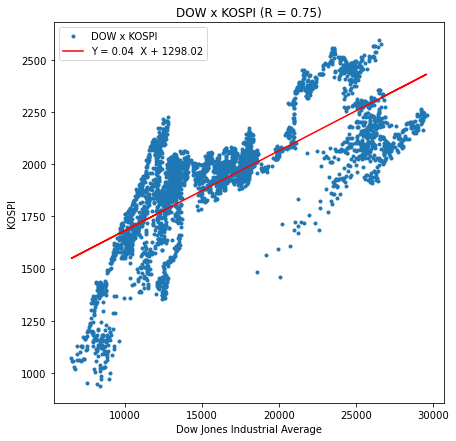

In [9]:
from scipy import stats

df = pd.DataFrame({'X':dow['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
 
regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f}  X + {regr.intercept:.2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.') 
plt.plot(df.X, regr.slope*df.X + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [10]:
# 다우존스 지수 데이터 대신 미국 국채에 해당하는 iShares 20 + Year Treasury Bond ETF(TLT)과 코스피 지수사이의 관계
# iShares 20 + Year Treasury Bond ETF(TLT)의 데이터가 없어 
# SPDR Portfolio Long Term Treasury ETF (SPTL) 사용
# 참고 : https://soojong.tistory.com/entry/%EB%AF%B8%EA%B5%AD%EC%A3%BC%EC%8B%9D%EB%B0%B0%EB%8B%B9%EC%A3%BC-TLT-ETF
# https://investstory-k.tistory.com/18

#ETF list 가져오기
# df_etf = fdr.EtfListing('US')
# df_etf.head(10)

# df_etf[df_etf['Symbol']=='TLT']
# df_etf[df_etf['Symbol']=='SPTL']

sptl = fdr.DataReader('SPTL', '2000-01-04')
sptl.head(10)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-11-15,36.48,36.34,36.50,36.23,79350.0,0.0108
2017-11-16,36.13,36.30,36.39,36.13,115450.0,-0.0096
2017-11-17,36.43,36.32,36.43,36.30,120400.0,0.0083
2017-11-20,36.40,36.34,36.40,36.30,94710.0,-0.0008
2017-11-21,36.49,36.62,36.65,36.39,75140.0,0.0025
2017-11-22,36.63,36.48,36.63,36.45,57980.0,0.0038
2017-11-24,36.52,36.58,36.58,36.49,73990.0,-0.0030
2017-11-27,36.48,36.55,36.57,36.45,125500.0,-0.0011
2017-11-28,36.51,36.50,36.62,36.46,74940.0,0.0008


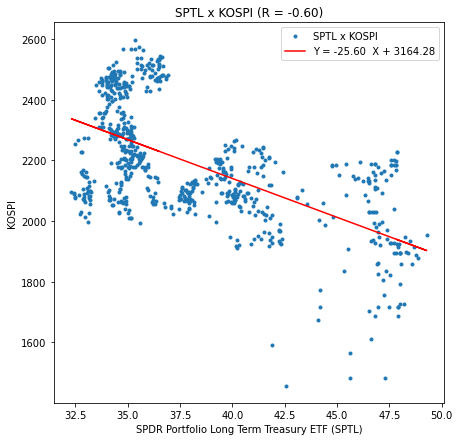

In [11]:
# SPTL이던 TLT던 데이터가 이상함
# datareader 상으로 2017-11-15부터 데이터 있음
from scipy import stats

kospi = fdr.DataReader('KS11', '2017-11-15')
sptl = fdr.DataReader('SPTL', '2017-11-15')

df = pd.DataFrame({'X':sptl['Close'], 'Y':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
 
regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f}  X + {regr.intercept:.2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, '.') 
plt.plot(df.X, regr.slope*df.X + regr.intercept, 'r')
plt.legend(['SPTL x KOSPI', regr_line])
plt.title(f'SPTL x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('SPDR Portfolio Long Term Treasury ETF (SPTL)')
plt.ylabel('KOSPI')
plt.show()

In [12]:
import wrds
db = wrds.Connection()

WRDS recommends setting up a .pgpass file.
You can find more info here:
https://www.postgresql.org/docs/9.5/static/libpq-pgpass.html.
Loading library list...
Done


In [13]:
db.list_tables(library='crsp')
db.describe_table(library='crsp', table='stocknames')
stocknames = db.get_table(library='crsp', table='stocknames')
stocknames[stocknames['ticker']=='TLT']

Approximately 62339 rows in crsp.stocknames.


,permno,permco,namedt,nameenddt,cusip,ncusip,ticker,comnam,hexcd,exchcd,siccd,shrcd,shrcls,st_date,end_date,namedum
55584,89468.0,37493.0,2002-07-26,2007-08-30,46428743,46428743,TLT,ISHARES TRUST,3.0,2.0,6726.0,73.0,None,2002-07-31,2019-12-31,2.0
55585,89468.0,37493.0,2007-08-31,2016-02-01,46428743,46428743,TLT,ISHARES TRUST,3.0,4.0,6726.0,73.0,None,2002-07-31,2019-12-31,2.0
55586,89468.0,37493.0,2016-02-02,2019-12-31,46428743,46428743,TLT,ISHARES TRUST,3.0,3.0,6726.0,73.0,None,2002-07-31,2019-12-31,2.0


In [14]:
# CRSP에는 2002-07-31 에서 2019-12-31로 최신데이터는 반영 안됨
# 그냥 야후 데이터를 쓰기로 했다.
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pyplot as plt
tlt = pdr.get_data_yahoo('TLT', '2000-01-04')   
tlt.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-07-30,81.750000,81.900002,81.519997,81.519997,43.133720,6100
2002-07-31,81.949997,82.800003,81.900002,82.529999,43.668156,29400
2002-08-01,82.540001,83.019997,82.540001,83.000000,43.916832,25000
2002-08-02,83.160004,84.099998,82.879997,83.849998,44.366570,52800
2002-08-05,84.040001,84.440002,83.849998,84.220001,44.562386,61100


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


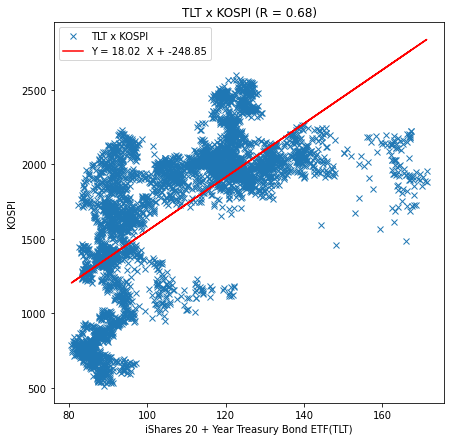

In [15]:
tlt = pdr.get_data_yahoo('TLT', '2002-07-31')   
kospi = pdr.get_data_yahoo('^KS11', '2002-07-31')

df = pd.DataFrame({'X':tlt['Close'], 'Y':kospi['Close']})

df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
 
regr = stats.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f}  X + {regr.intercept:.2f}'

plt.figure(figsize=(7, 7))
plt.plot(df.X, df.Y, 'x') 
plt.plot(df.X, regr.slope*df.X + regr.intercept, 'r')
plt.legend(['TLT x KOSPI', regr_line])
plt.title(f'TLT x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('iShares 20 + Year Treasury Bond ETF(TLT)')
plt.ylabel('KOSPI')
plt.show()

In [16]:
# 위험 보정 수익률 : 샤프 지수, 트레이너 지수, 소르티노 지수, 젠센 알파
# 샤프지수는 보편적으로 이용되는 성과척도
# sharp ratio = (R - Rf)/sigma
# R : 포트폴리오 or 개별 주식의 평균 수익률
# Rf : 무위험 자산의 평균 수익률 (무위험 금리)
# sigma : 포트폴리오 or 주식 초과 이익의 표준편차(sqrt(var(R-Rf)))

import pandas as pd
import scipy as sp
import numpy as np
import FinanceDataReader as fdr

# 무위험 금리 
Rf = 0.01/252

# 삼성전자 5년간 가격데이터
Ri_df = fdr.DataReader('005930', '2015-01-01', '2019-12-31')

retSamSung = np.log(Ri_df['Close']) - np.log(Ri_df['Close'].shift(1))
retSamSung = retSamSung.dropna()

# 연간 샤프지수
sharpe = (sp.mean(retSamSung)*252-np.log(1+Rf)*252)/(sp.std(retSamSung-Rf)*np.sqrt(252))
# 분산에 같은 값을 빼면 영향 없음
# sharpe = (sp.mean(retSamSung)-np.log(1+Rf))/(sp.std(retSamSung-Rf))
print(sharpe)

0.5582339871750726


In [17]:
print(sp.mean(retSamSung)*5*252)
print(sp.std(retSamSung))

0.7614085999473985
0.016055845022319198


In [18]:
# 트레이너 지수
# 고려 대상인 포트폴리오가 자산 전체가 아니라 일부인 경우는 전체 리스크를 사용하는 방식이 부적절하다.
# 이 때문에 트레이너 지수는 분모에 시그마(전체 리스크)가 아닌 베타(시장 리스크)로 변경되었다.
# trynor ratio = (R - Rf)/beta

# 소르티노 지수
# 샤프지수의 첫번째 문제로 표준편차가 평균으로부터 상하 양방향을 모두 고려한다는 점.
# 보편적으로 투자가는 하향 리스크(평균 수익률 이하로의 표준 편차)에 훨씬 관심이 많음.
# 샤프지수의 두번째 문제는 분자에서는 평균 수익률을 무위험 금리와 비교했지만, 정작 분모에서는 같은 무위험 금리를 사용하지 않고 평균수익률을 사용했다는 것.
# n개의 수익률과 한 개의 무위험 금리 Rf 가 있다고 가정하자. 또한 전체 수익률 중 무위험 금리보다 낮은 것이 m 개라고 가정하자.
# 이 때 하방 부분 표준 편차(LPSD, Lower Partial Standard Deviation) LPSD = sigma_from i:1 to m (Ri-Rf)^2 / m-1 (여기서 Ri < Rf)
# 소르티노 지수 =  (R - Rf)/LPSD
# R : 포트폴리오 or 개별 주식의 평균 수익률
# Rf : 무위험 금리의 평균 수익률

# 젠센 알파 : 실현 이익과 기대 이익의 차이. 펀드매니저의 성과 척도로 많이 사용됨
# alpha_p = Rp - (Rf + beta_p(Rm - Rf))
# R은 모두 평균 수익률

In [19]:
# 주가의 수익률에 대해서
# 주가의 가격 데이터는 랜덤워크를 따르며, 위나 아래로의 추세를 가지고 있으므로 통계적 특성을 분석하기가 어려움
# 주가의 수익률 정보는 추세가 없고, 시간에 따른 확률분포의 변화가 작기 때문에 주가보다 더 많은 금융 현상의 정보를 제공함
# 수익률 정보를 기초로 분산, 변동성, 변동성 집중현상(변동성 예측에 활용) 등을 분석할 수 있음

# *분산 : 평균으로부터 멀리 떨어진 정도 (위험의 척도로 사용됨) 
# 분산대신 준분산(손실 구간의 편차만을 위험으로 간주)을 사용한 것이 효과적이라는 연구결과도 많음)
# 분포가 비대칭의 경우 준분산이 분산보다 효과적인 기준이 될 수 있음
# 위험의 척도로 준분산을 사용하면 투자자의 선호도를 잘 설명할 수 있음
# 실제 투자자가 느끼는 위험의 개념과 잘 부합함
# *변동성 : 평균이 일정한 시계열에서 시간에 따라 분산이 변하는 성질
# ex. VIX 지수에서 변동성을 계산할때 sigma^2 = 2/T * {(P_2-P_1)/P_1 - ln(P2/P1)}로 계산함.
# 마코위츠는 변동성 기준을 sigma^2 = sum(r_i-E(r))/n 으로 쓰자고 했음
# 위의 2가지 분산 계산방식은 소수점 셋째자리부터 차이가 나게 되고, 1번은 주로 순간변동성, 2번은 주로 평균변동성을 의미함

# 수익률(로그)의 확률분포는 정규분포와 유사하여 통계적 특성을 분석하기 용이함 (실제는 정규분포와는 약간 다름)
# 실제 관측 결과는 정규분포에 비해 큰 첨도와 두꺼운 꼬리(fat tail)이 나타남.
# (크게 오르거나 크게 떨어지는 현상이 정상확률보다 높게 나타남)
# 그렇지만 수익률(로그)가 정규분포를 따른다고 가정. 주가는 로그 정규분포를 따르게 됨

# 연속(로그)수익률(산술평균)과 이산 수익률(기하평균)의 차이가 있음
# Kodex200은 kospi200 지수의 이산 수익률을 추종하며, kodex 레버리지는 kospi200 지수의 이산 수익률의 2배를 추종하도록 만들어짐. 로그 수익률을 추종한 것이 아니기 때문에 kodex200과 kodex 레버리지는 시간이 지남에 따라 격차가 벌어짐
